**GRIP @ THE SPARKS FOUNDATION**

**Name : K VENKATA KRISHNA TEJASWI - GRIPDEC2020**

Task 3: Creating a Decision tree classifier and visualize it graphically¶

**BATCH: GRIPDEC20**

Technologies:
Programming Language: Python # - Libraries: Numpy, Pandas, Matplotlib, Scikitlearn, Seaborn For the given 'Iris' dataset, create the Decision Tree classifier and visualize it graphically. The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.


# IMPORTING LIBRARIES

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# LOAD DATA

In [3]:
my_data = pd.read_csv("/content/data_Iris.csv")

In [4]:
my_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [45]:
my_data['Species'].nunique()

3

In [46]:
my_data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

# Data Preprocessing

In [42]:
my_data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
X = my_data.drop(['Id','Species'],axis=1)

In [7]:
Y = my_data['Species']

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
label_encoder = LabelEncoder()

In [11]:
## Doing label encoding for dependent variable
integer_encoded = label_encoder.fit_transform(Y)

In [41]:
integer_encoded

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [14]:
# Install required libraries
!pip install pydotplus
!apt-get install graphviz -y

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
0 upgraded, 0 newly installed, 0 to remove and 14 not upgraded.


# Decission Tree before Pruning

In [28]:
from sklearn.model_selection import cross_val_score
dt2 = DecisionTreeClassifier()
cv_result = cross_val_score(dt2,X,Y,cv=5,scoring='f1_weighted')
cv_result

array([0.96658312, 0.96658312, 0.89974937, 0.96658312, 1.        ])

# Got 95.9% accurace before pruning

In [30]:
np.mean(cv_result)

0.9598997493734336

# Hyper tuning with the help of GRID search to avoid overfitting

In [31]:
param_grid = {'max_depth': [2,3,4,5,6,7,8,9,10], 'min_samples_leaf':[1,3,5,7,10,15]}

In [33]:
from sklearn.model_selection import GridSearchCV
dt3 = DecisionTreeClassifier()
gd_obj = GridSearchCV(dt3,param_grid,scoring='f1_weighted',cv=5)
gd_obj.fit(X,Y)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
          

# Best Parameters

In [34]:
gd_obj.best_params_

{'max_depth': 3, 'min_samples_leaf': 1}

In [35]:
dt_classifier = DecisionTreeClassifier(max_depth=3,min_samples_leaf=1)

In [36]:
later_cv_result = cross_val_score(dt_classifier, X,Y,cv=5,scoring='f1_weighted')

# Accuracy got increased from 95.9% to 97.3% after pruning

In [37]:
np.mean(later_cv_result)

0.973165236323131

In [39]:
# Defining the decision tree algorithm
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(max_depth=3,min_samples_leaf=1)
dtree.fit(X,integer_encoded)

print('Decision Tree Classifer Created')

Decision Tree Classifer Created


# Visualizing Decission tree with best parameters after pruning(removes overfitting)

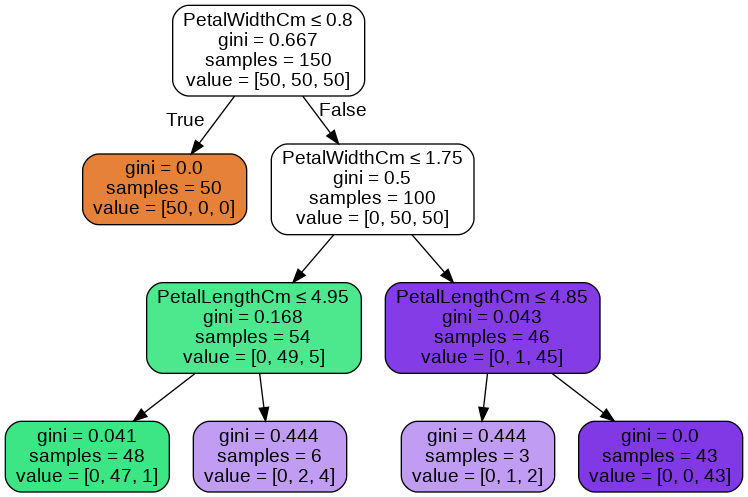

In [40]:
# Visualize the graph
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data, feature_names=X.columns,filled=True, rounded=True,special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

# Conclusion

I was able to create decision tree and avoid overfiiting by hyper tuning the parameters through grid search.
and accuracy also got increased from 95.9% to 97.3%